# **Lab 5: Differential Equations**
**Mirja Johnsson**

# **Abstract**

In lab 5 for *Methods in Scientific Computation* 2 variations of the method Eplicit Euler for differential equations were implemented. One is for a scalar intitial-value problem, and the other for a system of initial-value problems.

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [1]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**



[Hyperlink to DD2363 course website.](https://kth.instructure.com/courses/17068)

$
{\displaystyle \frac{\partial u}{\partial t}} + u\cdot \nabla u +\nabla p = f, \quad \nabla \cdot u=0$



In [1]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

#try:
#    from dolfin import *; from mshr import *
#except ImportError as e:
#    !apt-get install -y -qq software-properties-common 
#    !add-apt-repository -y ppa:fenics-packages/fenics
#    !apt-get update -qq
#    !apt install -y --no-install-recommends fenics
#    from dolfin import *; from mshr import *
    
#import dolfin.common.plotting as fenicsplot

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**
In this lab there are two mandatory assignments for solving differential equations. The first is for a scalar, initial-value problem. The second is for a system of initial-value problems.

Problem 1 can be solved using explicit Euler, or Euler forward as it's also known.

The function we are trying to solve has the form: u'(t) = f(u(t), t). It needs to be solved in discrete points according to evaluations along the x axis based on the step size k. 

u'(t_i) ≈ (u(t_i+1) - u(t_i))/k . -> u(t_i+1) = u(t_i) + k* f(u(t_i),t)


#**Method**
With a scalar initial value problem it's possible to approximately solve a first-order differential equation using a time-stepping method like Explicit Euler, which is implemented below. 

If you expand this from a scalar initial-value problem to a system of initial-values problem it is possibe to use the same time-stepping method to solve higher-order differential equations.  

In [14]:
 #1. Function: Time stepping for scalar initial value problem du/dt = f(u,t)

#Input: final time T, function f(u,t), initial value u(0)
#Output: approximation U(t_n) for the time interval [0,T] 
#Test: verify accuracy and stability with respect to model problem.
#solve u'(t) = f(u,t) in n timesteps from [0,T]. Where u(0) = U0 
def euler_forward(func, U0, T, n):
    t = np.zeros(n+1) #n steps gives n+1 intervals
    u = np.zeros(n+1)
    u[0] = U0 #set given initial value
    dt = T/n #size of timestep
    for k in range(n):
        t[k+1] = t[k] + dt
        u[k+1] = u[k] + dt*(func(u[k],t[k]))
    
    return u,t





In [15]:
#2. Function: Time stepping for a system of initial value problems du/dt = f(u,t)

#Input: final time T, function f(u,t), initial value u(0)
#Output: approximation U(t_n) for the time interval [0,T] 
#Test: verify accuracy and stability with respect to model problem.
def euler_forward_system(func2, U0, T, n):
    func = lambda u, t: np.asarray(func2(u,t))
    t = np.zeros(n+1) #n steps gives n+1 intervals
    if isinstance(U0, (int, float)):
      u = np.zeros(n+1)
    else:
      eqs = len(U0)
      u = np.zeros((n+1, eqs))

    u[0,:] = U0 #set given initial value for every column
    
    dt = T/n #size of timestep
    for k in range(n):
        t[k+1] = t[k] + dt
        u[k+1,:] = u[k,:] + dt*(func(u[k,:],t[k]))
    
    return u,t


def func(u,t):
  return (u[1], -u[0])



# **Results**
To test Forward-Euler it seemed a good idea to test it with the simplest differential equation - the exponential function e. As we can see from the plots we get closer and closer to the real solution when the step-size gets smaller. However, it is not a very reliable solution for problems with a large span [0,T] as the error propagates in every timestep. 

Text(0.5, 0, 't')

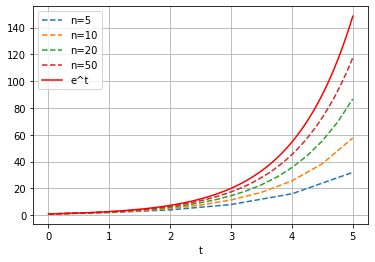

In [26]:
#Test Forward Euler (Explicit Euler)
%matplotlib inline

  #u' = u i.e. the exponential function 
def func(u,t):
    return u
for n in [5,10,20,50]:    
  u,t = euler_forward(func,U0 = 1, T = 5, n = n)
  plt.plot(t,u, '--',label=f"n={n}")
t = np.linspace(0,5, 100)
plt.plot(t, np.e**(t), label = "e^t", color = "red")
plt.grid()  
plt.legend()
plt.xlabel("t")


To demonstrate how the function for solving a system of initial values can solve a second-order differential equation I am using the sin function. 
We have the new condition that u'' + u = 0, u(0) = 0, u'(0) = 1. 
This is now our system of initial values. 



u = sin(t) is the known, analytical solution, and u' = cos(t) the exact derivative.



We will see how close we get to the sin function using Explicit Euler. 

Text(0, 0.5, 'func(u(t),t)')

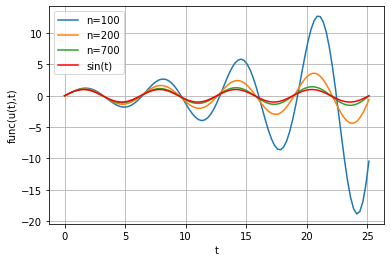

In [27]:
#Test System

def func(u,t):
  return (u[1],-u[0])
    
for n in [100,200,700]:    
  u,t = euler_forward_system(func,U0 = [0,1], T = 8*np.pi, n = n)
  plt.plot(t,u[:,0], label=f"n={n}")

t = np.linspace(0,8*np.pi, 1001)
plt.plot(t, np.sin(t), label = "sin(t)", color = "red")
plt.grid()
plt.legend()
plt.xlabel("t")
plt.ylabel("func(u(t),t)")

The plot shows how error propagates forwards in this method, and how much faster the function over-shoots and gets away from the correct values when the step size is bigger. The n in the plot is the number of points the function is evaluated on for the interval [0,T], giving a step size that is inversely proportional to n. 

# **Discussion**
In this assignment I chose to implement the simplest version of time-stepping methods - Explicit Euler. From the results it is clear to see why more complex methods have been invented. Explicit Euler works pretty well and does give a somewhat reliable picture of how the actual solution would behave, but it is very far from exact, especially as it goes on. 